# Demand forecasting for Bike Sharing/ Rental System

## Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the Data


In [3]:
bike_train_data= pd.read_csv('Data/train.csv')  
bike_test_data= pd.read_csv('Data/test.csv')

In [4]:
print('shape of training data',bike_train_data.shape)
print('shape of testing data',bike_test_data.shape)

shape of training data (10886, 12)
shape of testing data (6493, 9)


In [5]:
bike_train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Exploratory Data Analysis

### List of columns

In [7]:
bike_train_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Data types of columns

In [8]:
bike_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
bike_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### Dealing with null values

In [10]:
bike_train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
bike_test_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

### Feature engineering

In [12]:
df=bike_train_data.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')

#add new columns from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month 
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour 
df['dayofweek'] = df['datetime'].dt.dayofweek 

df.drop(["datetime"],axis=1,inplace=True)

In [14]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


### Summary Statistics

In [15]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000


### Distribution & Data patterns

In [16]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [17]:
%matplotlib inline
import seaborn as sns
def gen_all_plots(xlist,ylist,df):
    fig,axs = plt.subplots(len(xlist),len(ylist),figsize=(20,5))
    rows=len(xlist)
    cols=len(ylist)
    color=['red','green','blue']
    if rows==1:
        i=0
        x=xlist[i]
        if cols==1:
            j=0
            y=ylist[j]
            ax=axs
            temp=df[[x,y]].groupby([x]).agg({y :'sum'})
            p=sns.barplot(x=temp.index,y=y,data=temp,ax=ax)
            ax.set_title('{} vs {}'.format(x,y))
        else:
            for j in range(cols):       
                y=ylist[j]
                ax=axs[j]
                temp=df[[x,y]].groupby([x]).agg({y :'sum'})
                p=sns.barplot(x=temp.index,y=y,data=temp,ax=ax)
                ax.set_title('{} vs {}'.format(x,y))
    else:       
        for i in range(rows):
            x=xlist[i]
            if cols==1:
                j=0
                y=ylist[j]
                ax=axs[i]
                temp=df[[x,y]].groupby([x]).agg({y :'sum'})
                p=sns.barplot(x=temp.index,y=y,data=temp,ax=ax)
                ax.set_title('{} vs {}'.format(x,y))
            else:
                for j in range(cols):       
                    y=ylist[j]
                    ax=axs[i,j]
                    temp=df[[x,y]].groupby([x]).agg({y :'sum'})
                    p=sns.barplot(x=temp.index,y=y,data=temp,ax=ax)
                    ax.set_title('{} vs {}'.format(x,y))
    plt.show()

#### Season

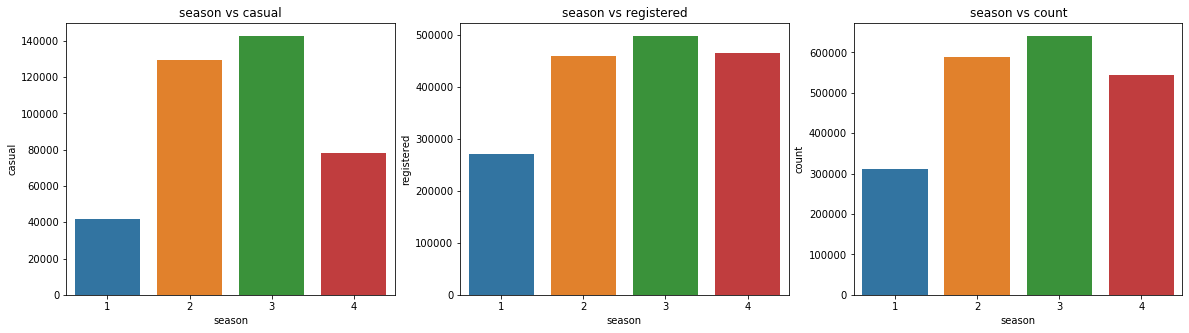

In [18]:
xlist=['season']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df) 

#### Humidity

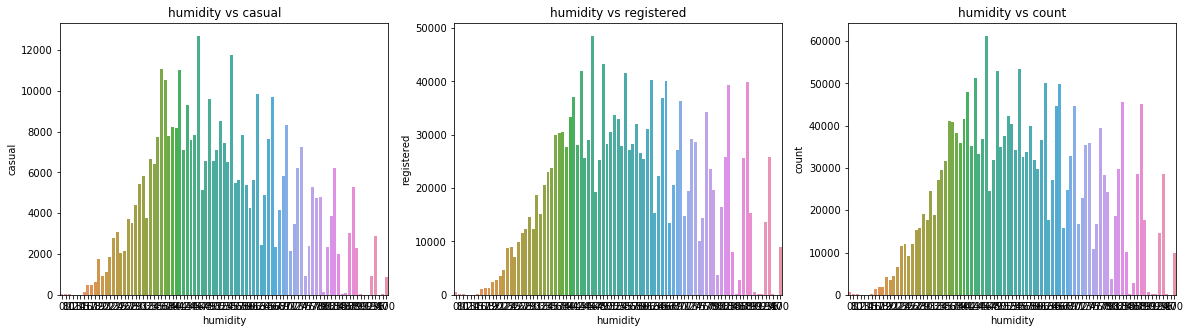

In [19]:
xlist=['humidity']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df) 

#### Temperature

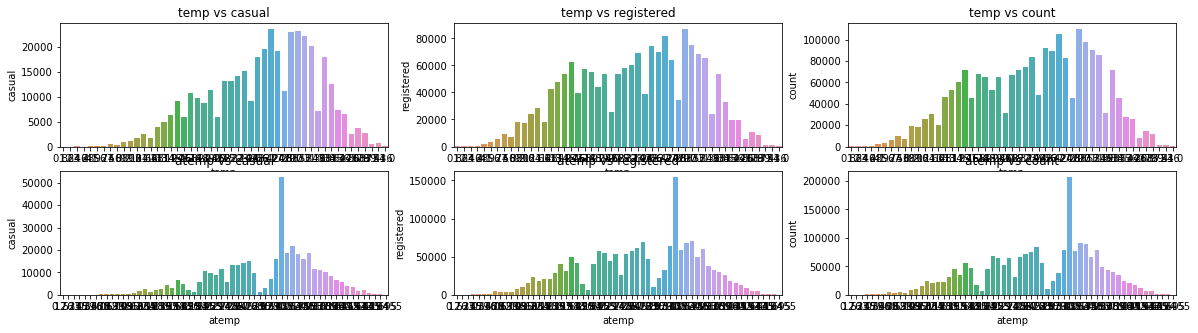

In [20]:
xlist=['temp','atemp']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df) 

#### Windspeed

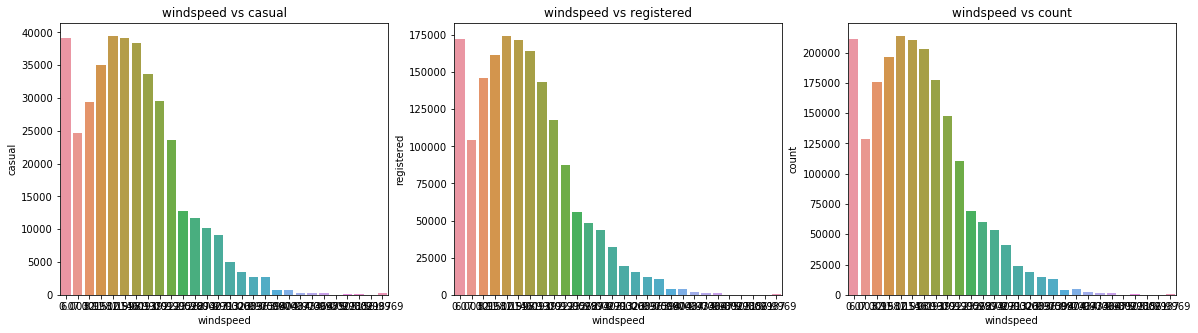

In [21]:
xlist=['windspeed']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df)

#### Year

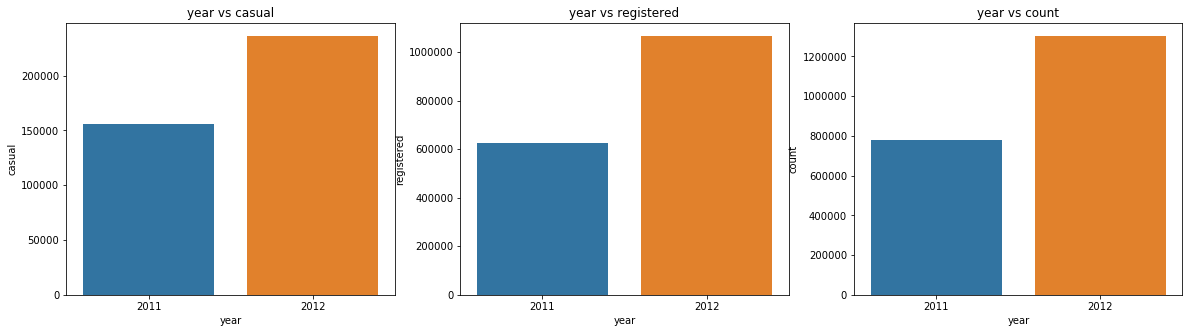

In [22]:
xlist=['year']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df)

#### Day of week

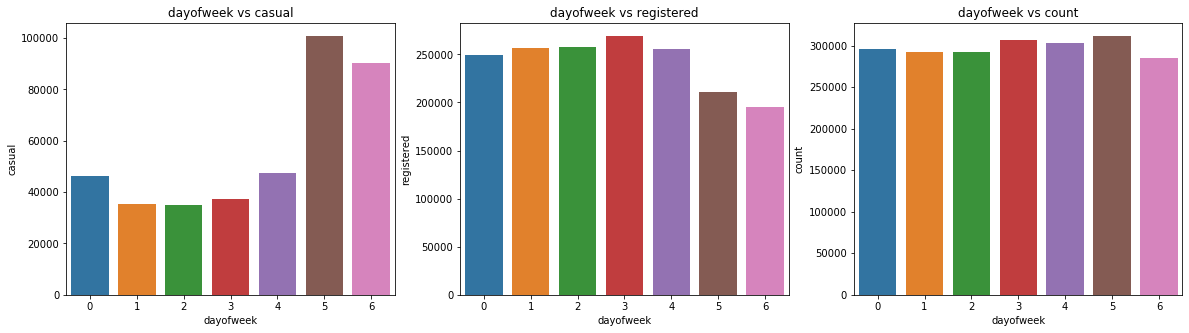

In [23]:
xlist=['dayofweek']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df)

#### Month

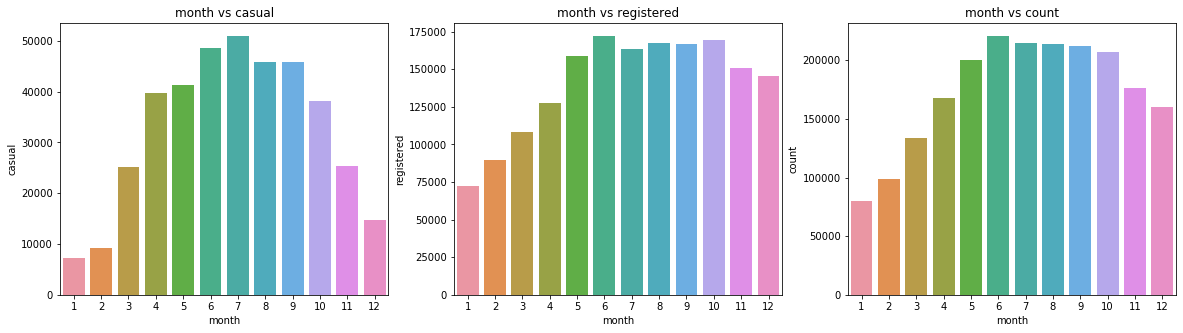

In [24]:
xlist=['month']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df)

#### Day

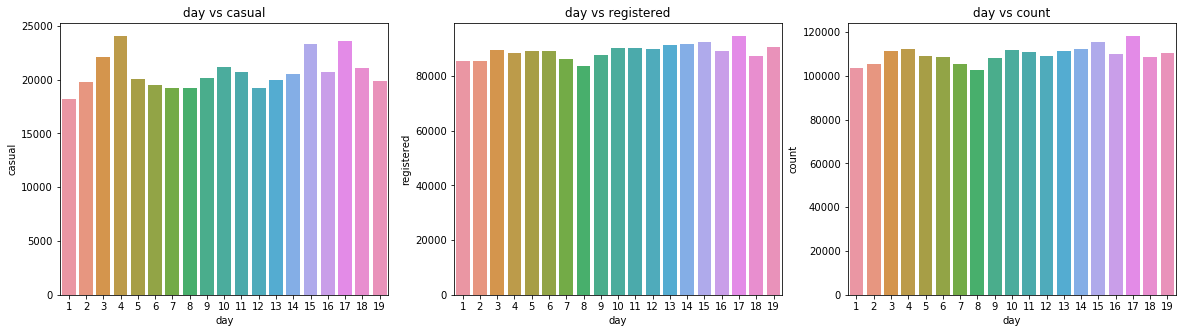

In [25]:
xlist=['day']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df)

#### Hour

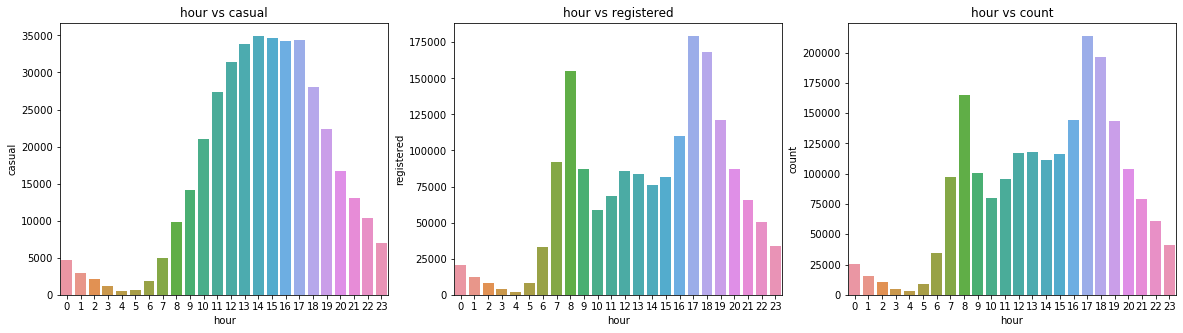

In [26]:
xlist=['hour']
ylist=[ 'casual', 'registered', 'count']
gen_all_plots(xlist,ylist,df)

#### Total booking wrt hour & Days

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


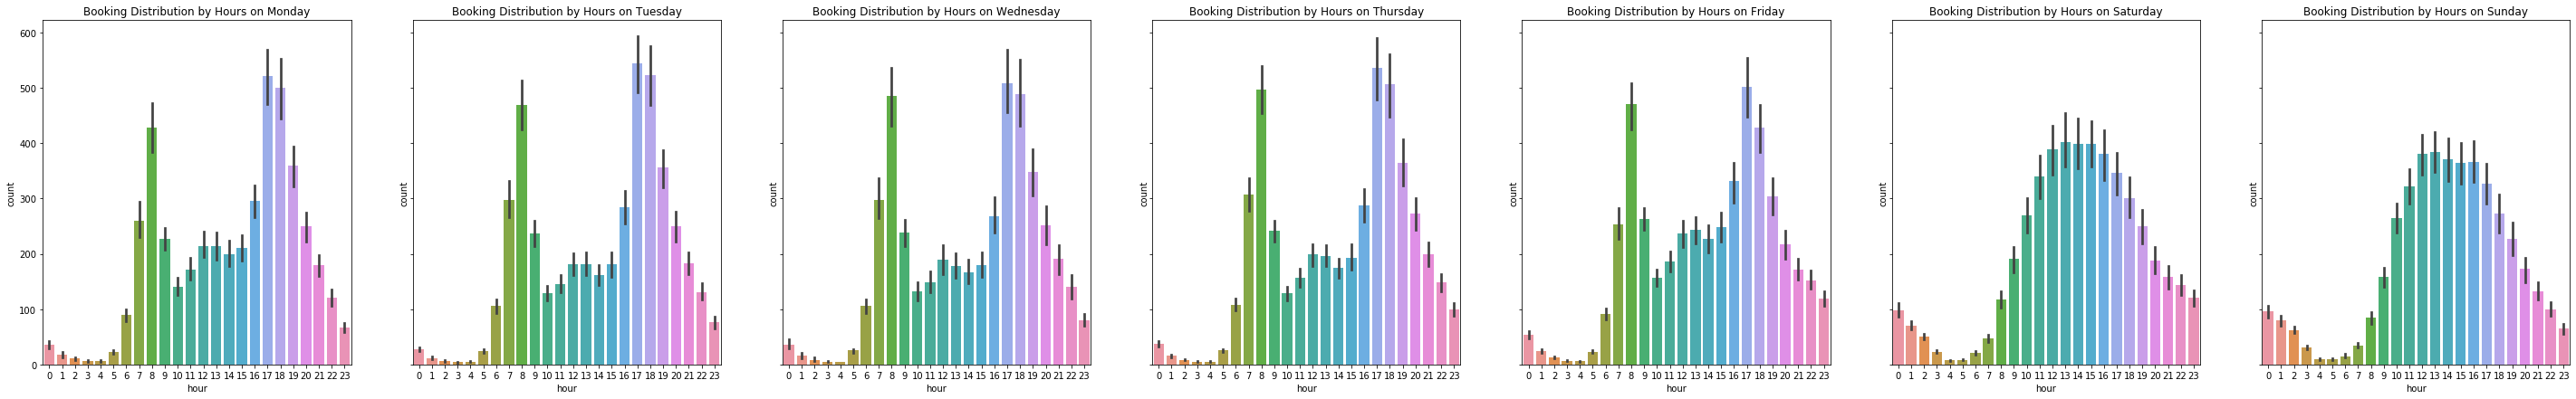

In [27]:
fig, ax = plt.subplots(1,7, figsize=(50,7), sharey=True)

days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]

for i in range(7): 
    #split data according to week-day
    day_data= df[df["dayofweek"] == i]
    #plot day's dstribution
    sns.barplot(x = "hour", y = "count", data = day_data, ax = ax[i]).set_title("Booking Distribution by Hours on " + days[i])
fig.show()

#### Registered wrt Hour & Days

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


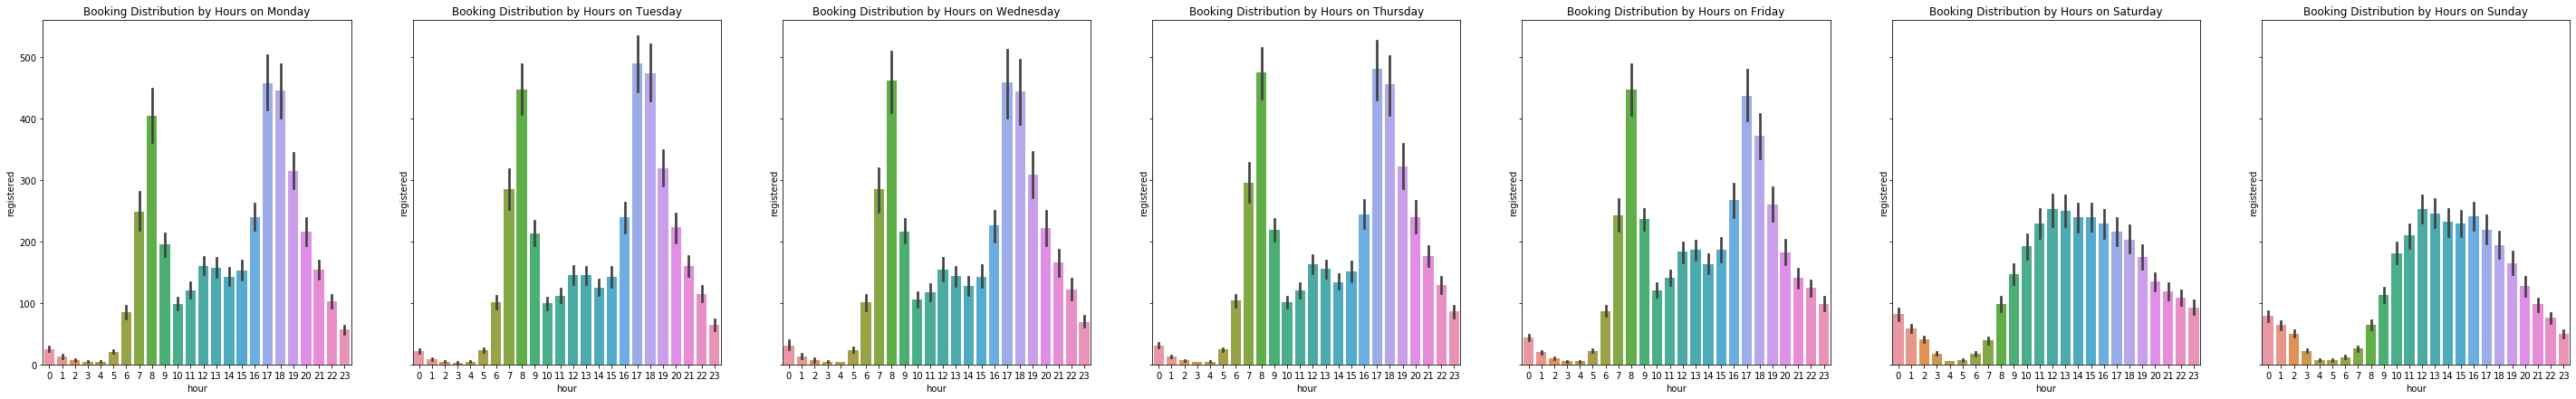

In [28]:
fig, ax = plt.subplots(1,7, figsize=(50,7), sharey=True)

days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]

for i in range(7): 
    #split data according to week-day
    day_data= df[df["dayofweek"] == i]
    #plot day's dstribution
    sns.barplot(x = "hour", y = "registered", data = day_data, ax = ax[i]).set_title("Booking Distribution by Hours on " + days[i])
fig.show()

#### Casual wrt hour & Days

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


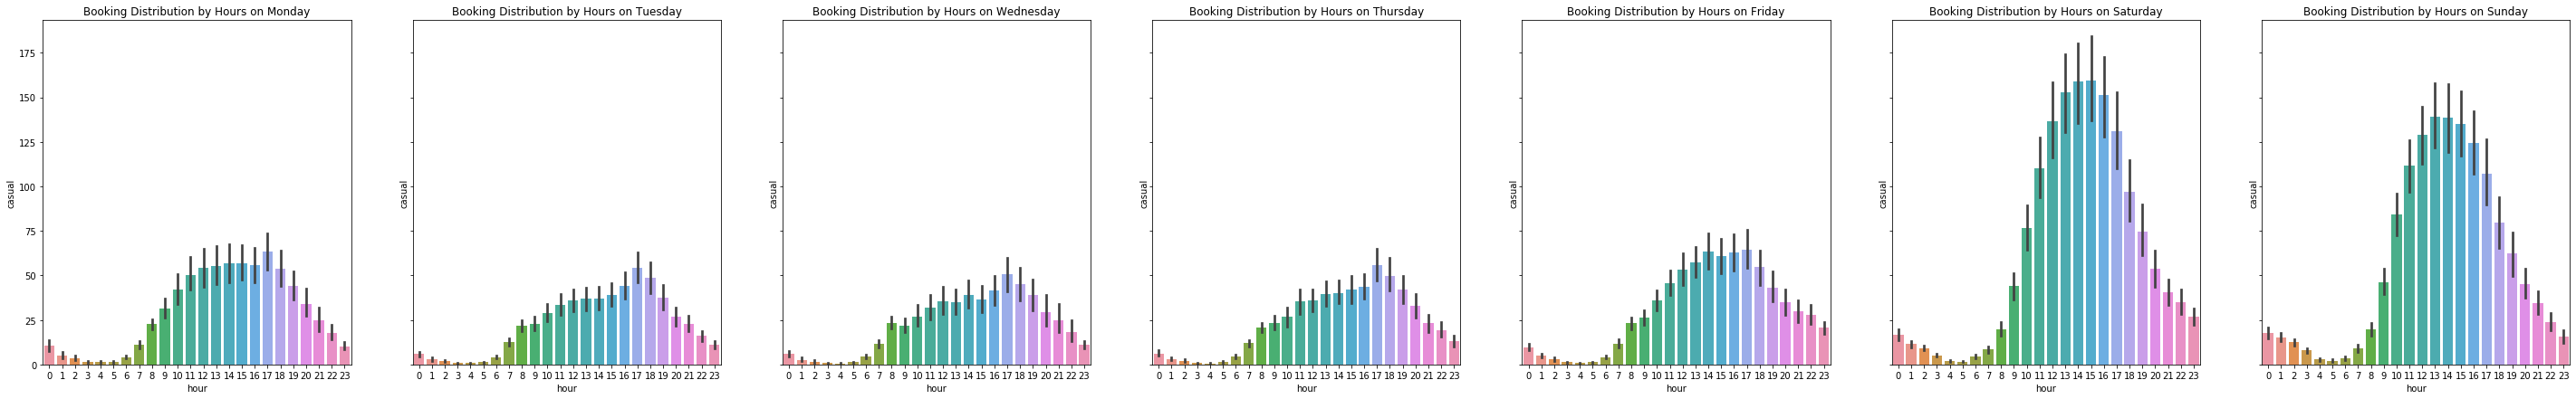

In [29]:
fig, ax = plt.subplots(1,7, figsize=(50,7), sharey=True)

days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]

for i in range(7): 
    #split data according to week-day
    day_data= df[df["dayofweek"] == i]
    #plot day's dstribution
    sns.barplot(x = "hour", y = "casual", data = day_data, ax = ax[i]).set_title("Booking Distribution by Hours on " + days[i])
fig.show()

### Outlier Detection & Removal

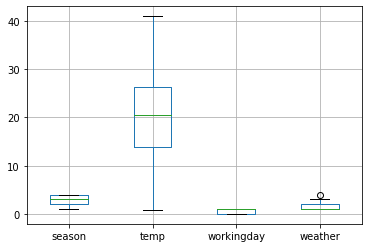

In [30]:
df[['season','temp','workingday','weather']].boxplot()

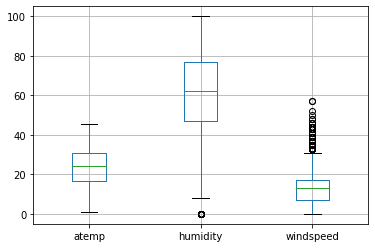

In [31]:
df[['atemp','humidity','windspeed']].boxplot()

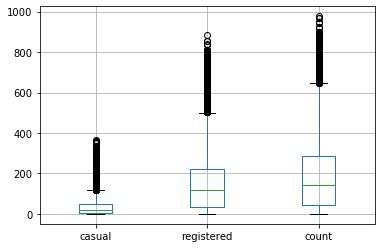

In [32]:
df[['casual','registered','count']].boxplot()

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

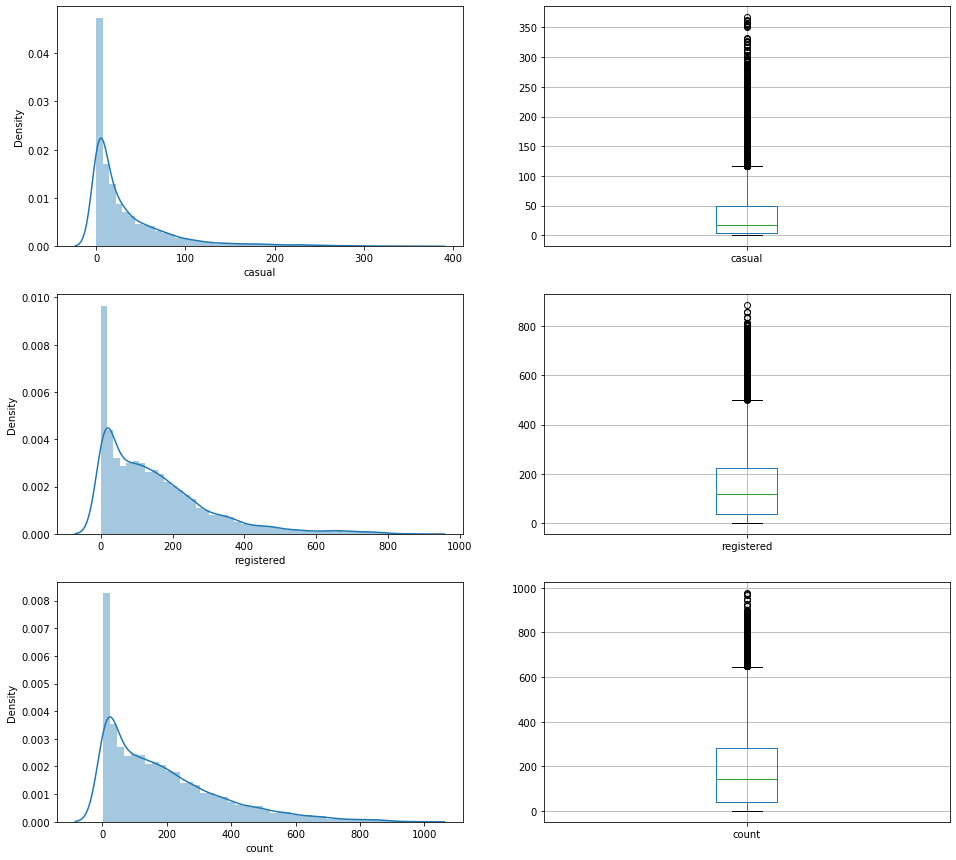

In [33]:
fig, ax = plt.subplots(3,2, figsize=(16,15))

#casual customers distribution plots
sns.distplot(df["casual"],ax=ax[0][0])
df.boxplot("casual", ax=ax[0][1])

#registered customers distribution plots
sns.distplot(df["registered"], ax=ax[1][0])
df.boxplot("registered", ax=ax[1][1])

#all customers distribution plots
sns.distplot(df["count"], ax=ax[2][0])
df.boxplot("count", ax=ax[2][1])

fig.show()

In [34]:
#normalize
df['casual_log'] = np.log((1+ df['casual']))
df['registered_log'] = np.log((1+ df['registered']))
df['count_log'] = np.log((1+ df['count']))
df['windspeed_log']=np.log((1+df['weather']))

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

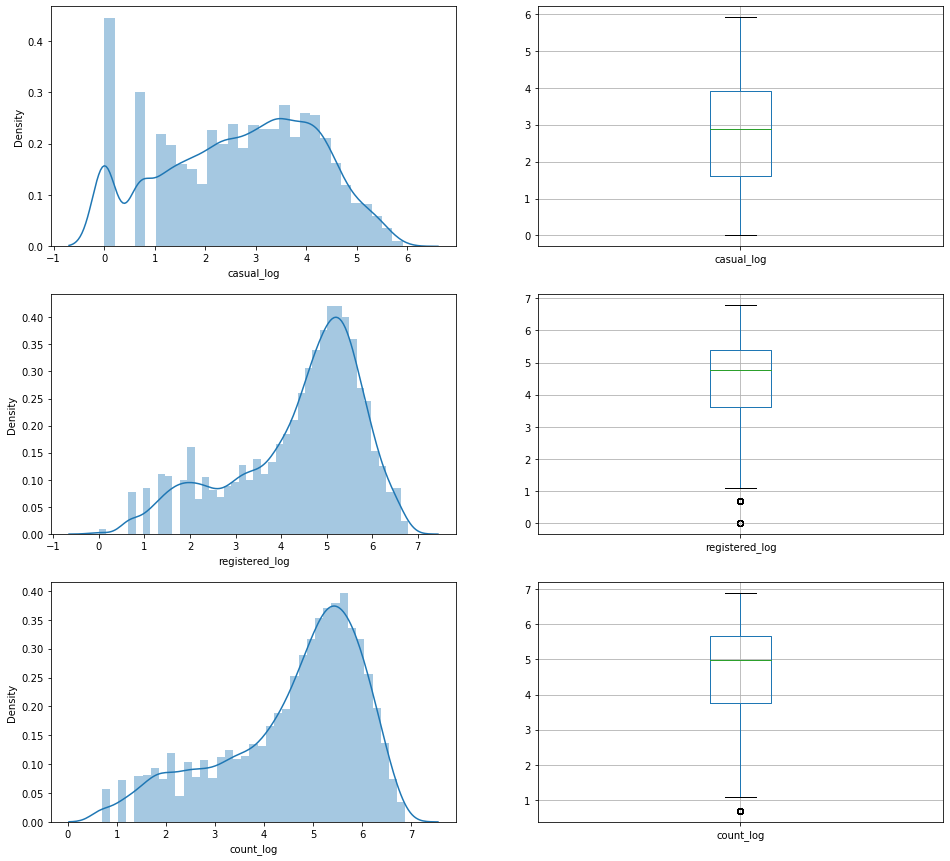

In [35]:
fig, ax = plt.subplots(3,2, figsize=(16,15))

#casual customers distribution plots
sns.distplot(df["casual_log"],ax=ax[0][0])
df.boxplot("casual_log", ax=ax[0][1])

#registered customers distribution plots
sns.distplot(df["registered_log"], ax=ax[1][0])
df.boxplot("registered_log", ax=ax[1][1])

#all customers distribution plots
sns.distplot(df["count_log"], ax=ax[2][0])
df.boxplot("count_log", ax=ax[2][1])

fig.show()

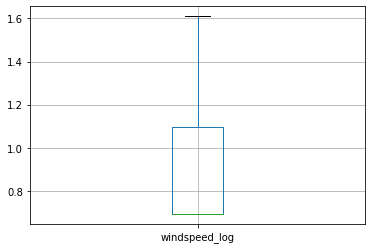

In [36]:
df[['windspeed_log']].boxplot()

### correlation between parameters

In [37]:
df[['season','temp','atemp','humidity']].corr()

,season,temp,atemp,humidity
season,1.000000,0.258689,0.264744,0.190610
temp,0.258689,1.000000,0.984948,-0.064949
atemp,0.264744,0.984948,1.000000,-0.043536
humidity,0.190610,-0.064949,-0.043536,1.000000


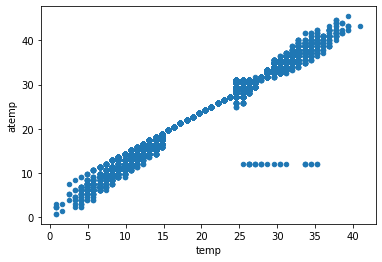

In [38]:
df.plot(kind='scatter',x='temp',y='atemp')

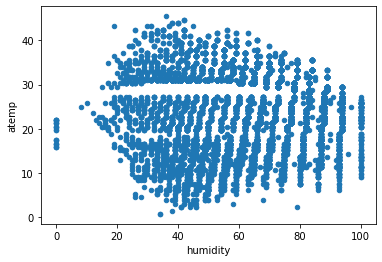

In [39]:
df.plot(kind='scatter',x='humidity',y='atemp')

In [40]:
#calculating correlence array for the attributes bellow
df[["season","temp", "weather", "windspeed", "humidity"]].corr()


,season,temp,weather,windspeed,humidity
season,1.000000,0.258689,0.008879,-0.147121,0.190610
temp,0.258689,1.000000,-0.055035,-0.017852,-0.064949
weather,0.008879,-0.055035,1.000000,0.007261,0.406244
windspeed,-0.147121,-0.017852,0.007261,1.000000,-0.318607
humidity,0.190610,-0.064949,0.406244,-0.318607,1.000000


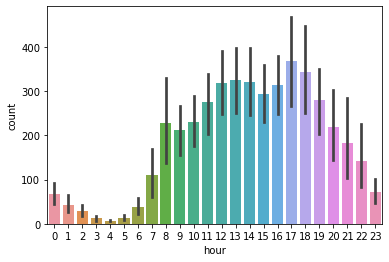

In [41]:
#plotting the holidays distribution excluding the weekends 
holiday_df = df[(df["holiday"]==1) & (df["dayofweek"]<5)]

sns.barplot(x = "hour", y = "count", data = holiday_df)

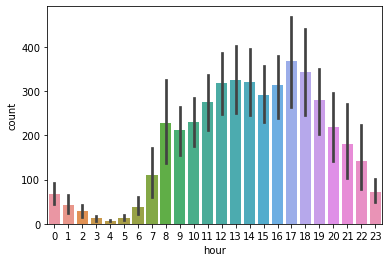

In [42]:
holiday_df = df[(df["workingday"]==0) & (df["dayofweek"]<5)]

sns.barplot(x = "hour", y = "count", data = holiday_df)

In [43]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,casual_log,registered_log,count_log,windspeed_log
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1.386294,2.639057,2.833213,0.693147
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,2.197225,3.496508,3.713572,0.693147
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,1.791759,3.332205,3.496508,0.693147
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,1.386294,2.397895,2.639057,0.693147
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,0.000000,0.693147,0.693147,0.693147


## <b> Summary of EDA</b>

- the distribution of bookings is consistent throughout the month regardles of the days number which leads us to believe that: <b>theres no need of 'day' attribute</b>

- the distribution among weeks is consistent, and is about the same for all days except for weekends. which is considered in the workday attribute, leads us to believe that:<b>there's no need for the dayofweek attribute</b> creating a new attribute weekend (0- yes , 1-no)

- The booking distribution in holidays is very similar to weekends, and the workingday bolean atribute is taking this variable in account (it's 1 when the day isn't a holiday or a weekend).<b>there's no need for the holiday attribute</b>

- temp & atemp are highy correlated .<b> we donot require the atemp attribute</b>

## Final Data prep

In [44]:
df['weekend']=df['dayofweek'].apply(lambda x : 1 if x>=5 else 0)

In [45]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'dayofweek', 'casual_log', 'registered_log',
       'count_log', 'windspeed_log', 'weekend'],
      dtype='object')

In [46]:
df.drop(columns=['atemp','dayofweek','holiday','count', 'registered','casual',"windspeed"],inplace=True)
df.head()

,season,workingday,weather,temp,humidity,year,month,day,hour,casual_log,registered_log,count_log,windspeed_log,weekend
0,1,0,1,9.84,81,2011,1,1,0,1.386294,2.639057,2.833213,0.693147,1
1,1,0,1,9.02,80,2011,1,1,1,2.197225,3.496508,3.713572,0.693147,1
2,1,0,1,9.02,80,2011,1,1,2,1.791759,3.332205,3.496508,0.693147,1
3,1,0,1,9.84,75,2011,1,1,3,1.386294,2.397895,2.639057,0.693147,1
4,1,0,1,9.84,75,2011,1,1,4,0.000000,0.693147,0.693147,0.693147,1


In [47]:
def one_hot_encode_cagtegorical_col(data, categorical_features):
    df_cat = data[categorical_features].copy()
    for col in categorical_features:
        df_cat = pd.get_dummies(df_cat, columns=[col], prefix=[col], drop_first=True)
    return df_cat

In [48]:
categorical_columns=[ "season", "weather"]

In [50]:
df_cat=one_hot_encode_cagtegorical_col(df,categorical_columns)
df_cat.columns   

Index(['season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [51]:
df_cat.head()

,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [52]:
numerical_col_list =np.setdiff1d(df.columns.to_list(), categorical_columns).tolist()
df[numerical_col_list]

,casual_log,count_log,day,hour,humidity,month,registered_log,temp,weekend,windspeed_log,workingday,year
0,1.386294,2.833213,1,0,81,1,2.639057,9.84,1,0.693147,0,2011
1,2.197225,3.713572,1,1,80,1,3.496508,9.02,1,0.693147,0,2011
2,1.791759,3.496508,1,2,80,1,3.332205,9.02,1,0.693147,0,2011
3,1.386294,2.639057,1,3,75,1,2.397895,9.84,1,0.693147,0,2011
4,0.000000,0.693147,1,4,75,1,0.693147,9.84,1,0.693147,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2.079442,5.820083,19,19,50,12,5.799093,15.58,0,0.693147,1,2012
10882,2.397895,5.488938,19,20,57,12,5.446737,14.76,0,0.693147,1,2012
10883,1.609438,5.129899,19,21,61,12,5.105945,13.94,0,0.693147,1,2012
10884,2.564949,4.867534,19,22,61,12,4.770685,13.94,0,0.693147,1,2012


In [54]:
df=pd.concat([df[numerical_col_list],df_cat],axis=1)
df.head()

,casual_log,count_log,day,hour,humidity,month,registered_log,temp,weekend,windspeed_log,workingday,year,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,1.386294,2.833213,1,0,81,1,2.639057,9.84,1,0.693147,0,2011,0,0,0,0,0,0
1,2.197225,3.713572,1,1,80,1,3.496508,9.02,1,0.693147,0,2011,0,0,0,0,0,0
2,1.791759,3.496508,1,2,80,1,3.332205,9.02,1,0.693147,0,2011,0,0,0,0,0,0
3,1.386294,2.639057,1,3,75,1,2.397895,9.84,1,0.693147,0,2011,0,0,0,0,0,0
4,0.000000,0.693147,1,4,75,1,0.693147,9.84,1,0.693147,0,2011,0,0,0,0,0,0


In [56]:
df.shape

(10886, 18)

## Modelling

In [57]:
#split data into train & validation set
df_train = df[df['day']<15]
df_test = df[df['day']>=15]

x_train =df_train.drop(columns=['casual_log','count_log','registered_log'])
y_train=df_train['count_log']


x_test =df_test.drop(columns=['casual_log','count_log','registered_log'])
y_test=df_test['count_log']

In [68]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from datetime import datetime
selected_models={
    'linear regression':{
        'model':LinearRegression()
        
    },
    'random forest':{
        'model':RandomForestRegressor()
    },
    'xgboost':{
        'model':XGBRegressor()
    },
    'catboost':{
        'model':CatBoostRegressor()
    },
    'light gradient boost':{
        'model':LGBMRegressor()
    }
    
}

In [135]:
results=[]
for model_nme, model_dict in selected_models.items():
    model=model_dict['model']
    
    start_time=datetime.now()
    
    model.fit(x_train,y_train)
    
    end_time=datetime.now()
    time_tot =end_time-start_time
    
    results.append({
        'model name':model_nme,
        'model':model,
        'train score':model.score(x_train,y_train),
        'r2 score':r2_score(y_test,model.predict(x_test)),
        'time(s)':time_tot.seconds+(time_tot.microseconds/10**6),
        'pred':model.predict(x_test)
    })

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:21:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.056546
0:	learn: 1.3749737	total: 3.64ms	remaining: 3.64s
1:	learn: 1.3202685	total: 8.04ms	remaining: 4.01s
2:	learn: 1.2725750	total: 11.8ms	remaining: 3.94s
3:	learn: 1.2251351	total: 15.4ms	remaining: 3.82s
4:	learn: 1.1798559	total: 19.2ms	remaining: 3.83s
5:	learn: 1.1391239	total: 23.7ms	remaining: 3.92s
6:	learn: 1.0990805	total: 27.8ms	remaining: 3.94s
7:	learn: 1.0629819	total: 31.6ms	remaining: 3.92s
8:	learn: 1.0288472	total: 35.1ms	remaining: 3.87s
9:	learn: 0.9941183	total: 40ms	remaining: 3.96s
10:	learn: 0.9600053	total: 43.5ms	remaining: 3.91s
11:	learn: 0.9282114	total: 47.3ms	remaining: 3.89s
12:	learn: 0.9021440	total: 50.9ms	remaining: 3.87s
13:	learn: 0.8724114	total: 55.7ms	remaining: 3.92s
14:	learn: 0.8450165	total: 59.2ms	remaining: 3.89s
15:	learn: 0.8241443	total: 63ms	remai

170:	learn: 0.3080556	total: 676ms	remaining: 3.27s
171:	learn: 0.3077473	total: 683ms	remaining: 3.29s
172:	learn: 0.3073708	total: 687ms	remaining: 3.29s
173:	learn: 0.3070890	total: 691ms	remaining: 3.28s
174:	learn: 0.3066708	total: 695ms	remaining: 3.27s
175:	learn: 0.3063720	total: 699ms	remaining: 3.27s
176:	learn: 0.3061718	total: 704ms	remaining: 3.27s
177:	learn: 0.3058960	total: 708ms	remaining: 3.27s
178:	learn: 0.3054761	total: 711ms	remaining: 3.26s
179:	learn: 0.3052930	total: 715ms	remaining: 3.25s
180:	learn: 0.3050078	total: 719ms	remaining: 3.25s
181:	learn: 0.3048692	total: 722ms	remaining: 3.25s
182:	learn: 0.3044876	total: 726ms	remaining: 3.24s
183:	learn: 0.3041969	total: 729ms	remaining: 3.23s
184:	learn: 0.3037733	total: 733ms	remaining: 3.23s
185:	learn: 0.3035620	total: 736ms	remaining: 3.22s
186:	learn: 0.3032266	total: 740ms	remaining: 3.21s
187:	learn: 0.3029201	total: 743ms	remaining: 3.21s
188:	learn: 0.3026835	total: 747ms	remaining: 3.2s
189:	learn: 0

340:	learn: 0.2745888	total: 1.35s	remaining: 2.61s
341:	learn: 0.2745025	total: 1.36s	remaining: 2.62s
342:	learn: 0.2743653	total: 1.36s	remaining: 2.61s
343:	learn: 0.2742577	total: 1.37s	remaining: 2.62s
344:	learn: 0.2741288	total: 1.38s	remaining: 2.62s
345:	learn: 0.2740575	total: 1.38s	remaining: 2.61s
346:	learn: 0.2739990	total: 1.39s	remaining: 2.61s
347:	learn: 0.2737719	total: 1.39s	remaining: 2.61s
348:	learn: 0.2736320	total: 1.4s	remaining: 2.6s
349:	learn: 0.2734428	total: 1.4s	remaining: 2.6s
350:	learn: 0.2733257	total: 1.4s	remaining: 2.6s
351:	learn: 0.2732226	total: 1.41s	remaining: 2.6s
352:	learn: 0.2731361	total: 1.42s	remaining: 2.6s
353:	learn: 0.2729514	total: 1.42s	remaining: 2.6s
354:	learn: 0.2727241	total: 1.43s	remaining: 2.59s
355:	learn: 0.2726143	total: 1.43s	remaining: 2.59s
356:	learn: 0.2724556	total: 1.43s	remaining: 2.58s
357:	learn: 0.2723711	total: 1.44s	remaining: 2.58s
358:	learn: 0.2722243	total: 1.44s	remaining: 2.57s
359:	learn: 0.2720301

508:	learn: 0.2538971	total: 2.02s	remaining: 1.95s
509:	learn: 0.2537850	total: 2.02s	remaining: 1.95s
510:	learn: 0.2536828	total: 2.03s	remaining: 1.94s
511:	learn: 0.2536044	total: 2.04s	remaining: 1.94s
512:	learn: 0.2535278	total: 2.04s	remaining: 1.94s
513:	learn: 0.2534342	total: 2.05s	remaining: 1.94s
514:	learn: 0.2532736	total: 2.05s	remaining: 1.93s
515:	learn: 0.2532460	total: 2.06s	remaining: 1.93s
516:	learn: 0.2531386	total: 2.06s	remaining: 1.92s
517:	learn: 0.2530961	total: 2.06s	remaining: 1.92s
518:	learn: 0.2529731	total: 2.07s	remaining: 1.92s
519:	learn: 0.2528714	total: 2.07s	remaining: 1.91s
520:	learn: 0.2527061	total: 2.07s	remaining: 1.91s
521:	learn: 0.2526011	total: 2.08s	remaining: 1.9s
522:	learn: 0.2524705	total: 2.08s	remaining: 1.9s
523:	learn: 0.2523047	total: 2.08s	remaining: 1.89s
524:	learn: 0.2522012	total: 2.09s	remaining: 1.89s
525:	learn: 0.2520925	total: 2.09s	remaining: 1.88s
526:	learn: 0.2519891	total: 2.09s	remaining: 1.88s
527:	learn: 0.

691:	learn: 0.2387261	total: 2.7s	remaining: 1.2s
692:	learn: 0.2386991	total: 2.71s	remaining: 1.2s
693:	learn: 0.2386398	total: 2.71s	remaining: 1.2s
694:	learn: 0.2385865	total: 2.72s	remaining: 1.19s
695:	learn: 0.2385332	total: 2.72s	remaining: 1.19s
696:	learn: 0.2384459	total: 2.73s	remaining: 1.19s
697:	learn: 0.2383879	total: 2.73s	remaining: 1.18s
698:	learn: 0.2383028	total: 2.73s	remaining: 1.18s
699:	learn: 0.2382112	total: 2.74s	remaining: 1.17s
700:	learn: 0.2380977	total: 2.74s	remaining: 1.17s
701:	learn: 0.2380799	total: 2.74s	remaining: 1.16s
702:	learn: 0.2379976	total: 2.75s	remaining: 1.16s
703:	learn: 0.2379199	total: 2.75s	remaining: 1.16s
704:	learn: 0.2378439	total: 2.75s	remaining: 1.15s
705:	learn: 0.2377861	total: 2.76s	remaining: 1.15s
706:	learn: 0.2377024	total: 2.76s	remaining: 1.14s
707:	learn: 0.2376318	total: 2.76s	remaining: 1.14s
708:	learn: 0.2375522	total: 2.77s	remaining: 1.14s
709:	learn: 0.2375134	total: 2.77s	remaining: 1.13s
710:	learn: 0.23

879:	learn: 0.2268067	total: 3.37s	remaining: 460ms
880:	learn: 0.2267585	total: 3.38s	remaining: 456ms
881:	learn: 0.2267129	total: 3.38s	remaining: 452ms
882:	learn: 0.2266602	total: 3.38s	remaining: 449ms
883:	learn: 0.2266212	total: 3.39s	remaining: 445ms
884:	learn: 0.2265772	total: 3.39s	remaining: 441ms
885:	learn: 0.2264870	total: 3.4s	remaining: 437ms
886:	learn: 0.2264143	total: 3.4s	remaining: 433ms
887:	learn: 0.2263955	total: 3.4s	remaining: 430ms
888:	learn: 0.2263224	total: 3.41s	remaining: 426ms
889:	learn: 0.2262519	total: 3.41s	remaining: 422ms
890:	learn: 0.2261926	total: 3.42s	remaining: 418ms
891:	learn: 0.2261109	total: 3.42s	remaining: 414ms
892:	learn: 0.2260650	total: 3.42s	remaining: 410ms
893:	learn: 0.2259827	total: 3.43s	remaining: 406ms
894:	learn: 0.2259044	total: 3.43s	remaining: 402ms
895:	learn: 0.2258391	total: 3.43s	remaining: 399ms
896:	learn: 0.2258086	total: 3.44s	remaining: 395ms
897:	learn: 0.2257487	total: 3.44s	remaining: 391ms
898:	learn: 0.2

In [136]:
results=pd.DataFrame(results)
results

,model name,model,train score,r2 score,time(s),pred
0,linear regression,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.500388,0.480724,0.006996,"[2.434628639479911, 2.590508036061692, 2.68828..."
1,random forest,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.992913,0.937696,3.094273,"[3.2383521559984505, 2.9828822541320825, 2.794..."
2,xgboost,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.935225,0.929006,0.719587,"[3.2984083, 3.059027, 2.460107, 2.0270689, 1.2..."
3,catboost,<catboost.core.CatBoostRegressor object at 0x0...,0.976178,0.946864,4.511344,"[3.369075010771735, 3.1474646549164893, 2.8587..."
4,light gradient boost,"LGBMRegressor(boosting_type='gbdt', class_weig...",0.967614,0.946496,0.137940,"[3.2693240619329615, 3.033266148470302, 2.6433..."


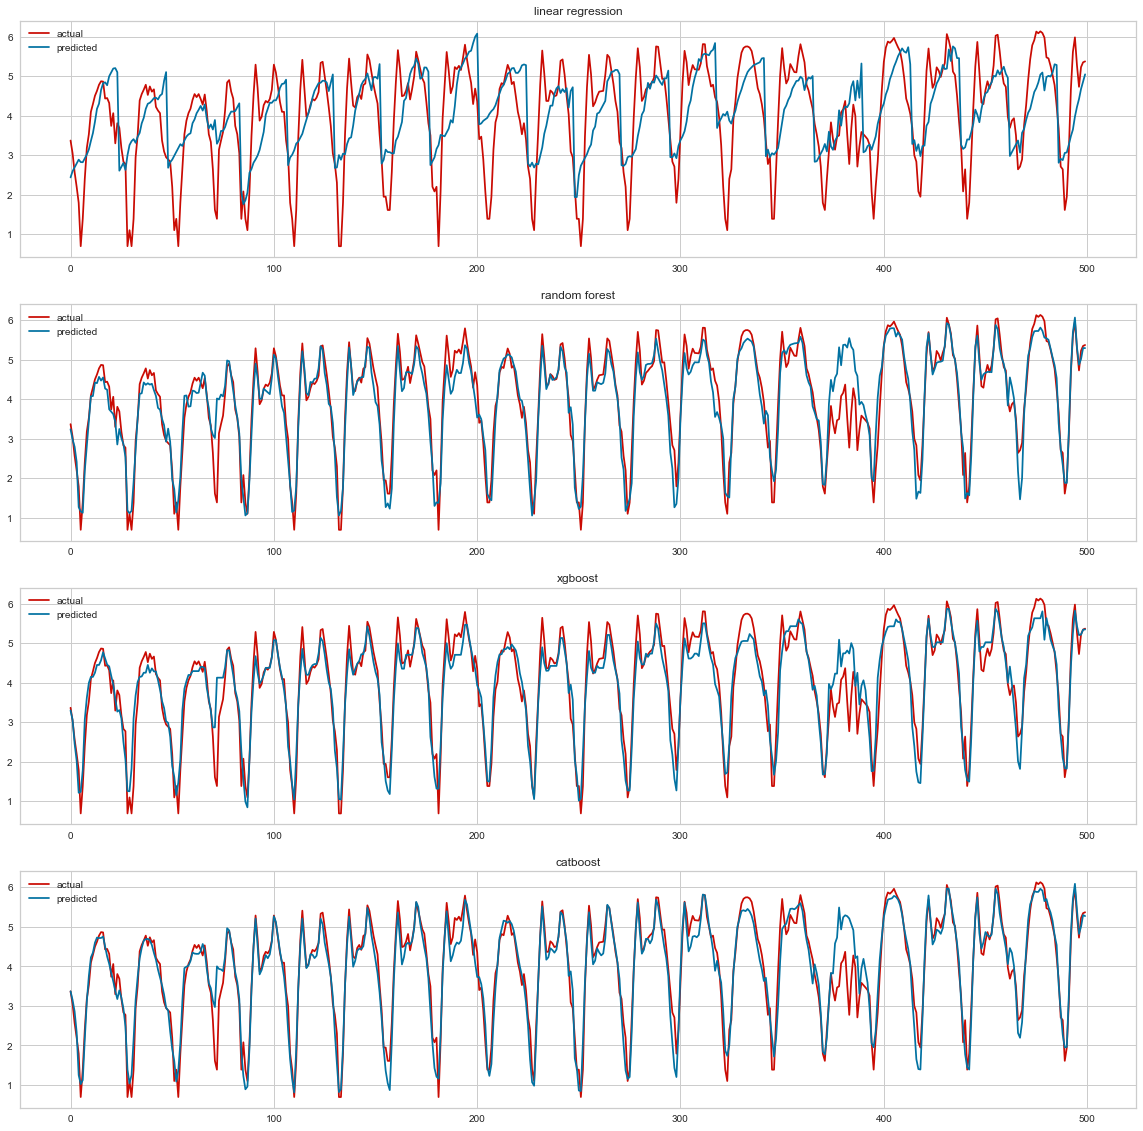

In [188]:
#plot ypred & ytrue
fig,axs=plt.subplots(4,1,figsize=(20,20))
for i in range(len(axs)):
    m=results.model[i]
    axs[i].plot(range(len(y_test.iloc[:500])),y_test.iloc[:500],label="actual",color='r')
    axs[i].plot(range(len(y_test.iloc[:500])),m.predict(x_test.iloc[:500]),label="predicted",color='b')
    axs[i].set_title(results['model name'][i])
    axs[i].legend()

## AutoML Pycaret Modelling


In [153]:
features =(df.drop(columns=['casual_log','registered_log','count_log']).columns).tolist()

In [154]:
import pycaret
from pycaret.regression import *
reg= setup(df.drop(columns=['casual_log','registered_log']),target ='count_log',numeric_features=features, session_id=786)

,Description,Value
0,session_id,786
1,Target,count_log
2,Original Data,"(10886, 16)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 15)"


In [155]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2024,0.0866,0.294,0.9569,0.08,0.0682,5.336
lightgbm,Light Gradient Boosting Machine,0.2151,0.0952,0.3083,0.9526,0.082,0.0719,0.081
rf,Random Forest Regressor,0.226,0.1098,0.3307,0.9455,0.0876,0.0759,1.493
et,Extra Trees Regressor,0.2258,0.1102,0.3316,0.9452,0.0889,0.076,1.14
gbr,Gradient Boosting Regressor,0.2849,0.1481,0.3847,0.9263,0.0957,0.0905,0.295
dt,Decision Tree Regressor,0.31,0.2115,0.4592,0.8949,0.1195,0.1008,0.03
ada,AdaBoost Regressor,0.5312,0.4324,0.6573,0.7848,0.1473,0.1549,0.236
knn,K Neighbors Regressor,0.5592,0.5726,0.756,0.7153,0.1785,0.1807,0.098
ridge,Ridge Regression,0.7949,1.016,1.008,0.4948,0.2291,0.2604,0.311
br,Bayesian Ridge,0.7949,1.016,1.008,0.4948,0.2291,0.2605,0.057


In [156]:
dt=create_model(estimator='rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2187,0.1018,0.319,0.9471,0.084,0.0712
1,0.2246,0.1037,0.3221,0.9469,0.0817,0.0708
2,0.2377,0.118,0.3435,0.9447,0.0916,0.0806
3,0.2457,0.1299,0.3604,0.9384,0.0977,0.0873
4,0.2438,0.1297,0.3602,0.9384,0.0986,0.0851
5,0.2131,0.0923,0.3038,0.9531,0.0808,0.0702
6,0.211,0.1019,0.3192,0.9474,0.0829,0.0698
7,0.218,0.1042,0.3228,0.9445,0.0823,0.0688
8,0.24,0.124,0.3522,0.9384,0.0931,0.0831
9,0.2069,0.0921,0.3035,0.9563,0.0837,0.0719


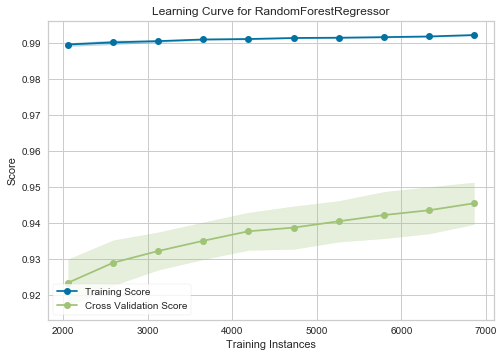

In [157]:
plot_model(estimator = dt, plot = 'learning')

## Result Prediction

In [161]:
bike_test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [162]:
df1=bike_test_data.copy()
df1['datetime']=pd.to_datetime(df1['datetime'],format='%Y-%m-%d %H:%M:%S')
#add new columns from the datetime column
df1['windspeed_log']=np.log((1+df1['weather']))
df1['year'] = df1['datetime'].dt.year
df1['month'] = df1['datetime'].dt.month 
df1['day'] = df1['datetime'].dt.day
df1['hour'] = df1['datetime'].dt.hour 
df1['dayofweek'] = df1['datetime'].dt.dayofweek 

df1.drop(['datetime'],axis=1,inplace=True)

df1['weekend']=df1['dayofweek'].apply(lambda x : 1 if x>=5 else 0)
df1.drop(columns=['atemp','dayofweek','holiday',"windspeed"],inplace=True)

categorical_columns=[ "season", "weather"]
df_cat=one_hot_encode_cagtegorical_col(df1,categorical_columns)
numerical_col_list =np.setdiff1d(df1.columns.to_list(), categorical_columns).tolist()
df1=pd.concat([df1[numerical_col_list],df_cat],axis=1)
df1.head()

,day,hour,humidity,month,temp,weekend,windspeed_log,workingday,year,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,20,0,56,1,10.66,0,0.693147,1,2011,0,0,0,0,0,0
1,20,1,56,1,10.66,0,0.693147,1,2011,0,0,0,0,0,0
2,20,2,56,1,10.66,0,0.693147,1,2011,0,0,0,0,0,0
3,20,3,56,1,10.66,0,0.693147,1,2011,0,0,0,0,0,0
4,20,4,56,1,10.66,0,0.693147,1,2011,0,0,0,0,0,0


In [163]:
#from random forest
dt.predict(df1)

array([2.55298605, 1.51967627, 1.63526349, ..., 5.01076575, 4.74462633,
       4.36936797])

In [165]:
#from light gradient boosting
x=results[results['model name']=='light gradient boost']['model'].iloc[0]
x.predict(df1)


array([2.1614543 , 1.44661374, 0.98799457, ..., 5.11339754, 4.85435859,
       4.5133741 ])

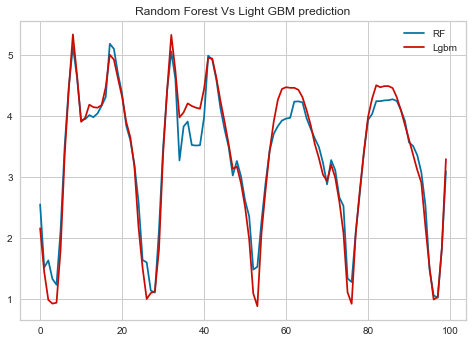

In [190]:
plt.Figure(figsize=(20,10))
plt.plot(range(len(df1.iloc[:100])),dt.predict(df1.iloc[:100]),label="RF")
plt.plot(range(len(df1.iloc[:100])),x.predict(df1.iloc[:100]),label="Lgbm",color='r')
p=plt.title('Random Forest Vs Light GBM prediction')
p=plt.legend()

## References

- <a href="https://towardsdatascience.com/are-outliers-ruining-your-machine-learning-predictions-search-for-an-optimal-solution-c81313e994ca"> one</a>
- <a href="https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32"> Two </a>
- <a href="https://towardsdatascience.com/forecasting-how-to-detect-outliers-cb65faafcd97"> forecast outlier detection </a>
- <a href="https://towardsdatascience.com/optimizing-product-price-using-regression-2c17688e65ea">price optimization</a>

- <a href="https://www.kaggle.com/letmewin97/ensemble-methods-over-view-0-08-mse/notebook"><b> look at ensemble approaches </b></a>